In [1]:
import sklearn
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install scikit-learn==1.3.0

# **Loading the dataset**

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.rename(columns = {'SepalLengthCm':'Sepal_length','SepalWidthCm':'Sepal_width','PetalLengthCm':'Petal_length','PetalWidthCm':'Petal_width'}, inplace = True)
df.head()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 5)

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
# Replace values in the 'species' column
df['Species'] = df['Species'].replace({'Iris-setosa': 'setosa',
                                       'Iris-virginica': 'virginica',
                                       'Iris-versicolor': 'versicolor'})

# Display the modified DataFrame
print("\nModified DataFrame:")
print(df)


Modified DataFrame:
     Sepal_length  Sepal_width  Petal_length  Petal_width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


# **Pre-processing**

In [11]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

<Axes: >

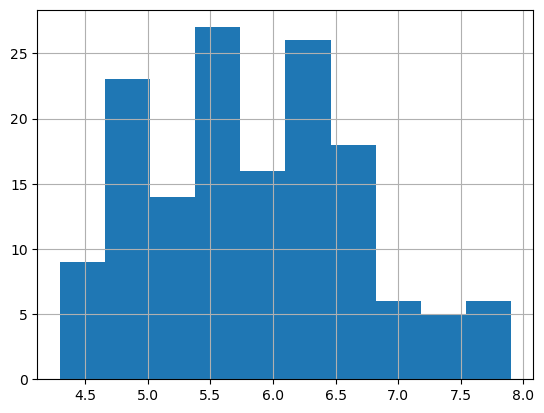

In [12]:
df['Sepal_length'].hist()

<Axes: >

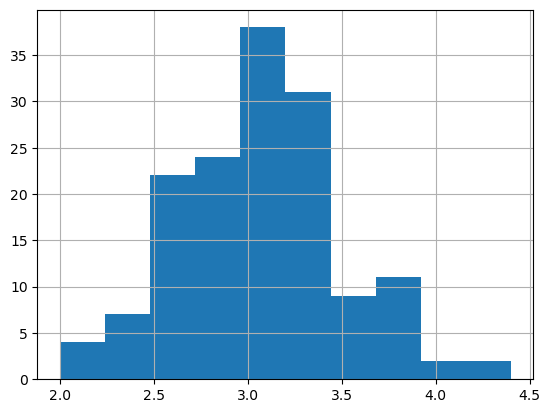

In [13]:
df['Sepal_width'].hist()

<Axes: >

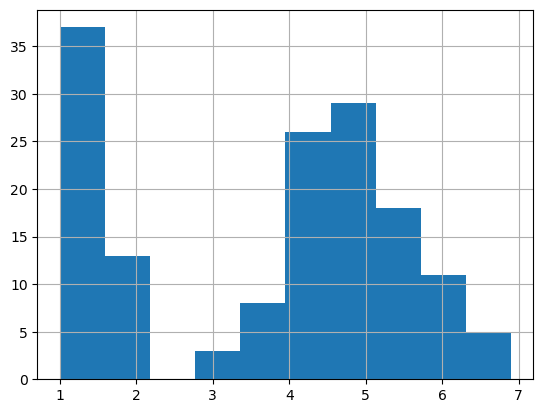

In [14]:
df['Petal_length'].hist()

<Axes: >

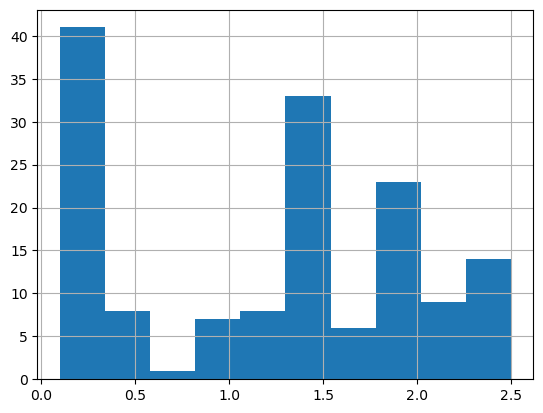

In [15]:
df['Petal_width'].hist()

In [16]:
#creating a list of colors and class labels
colors = ['red','orange','blue']
species = ['virginica','versicolor','setosa']

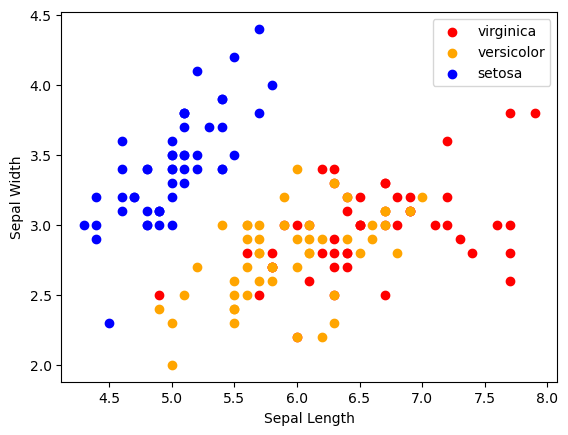

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal_length'], x['Sepal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

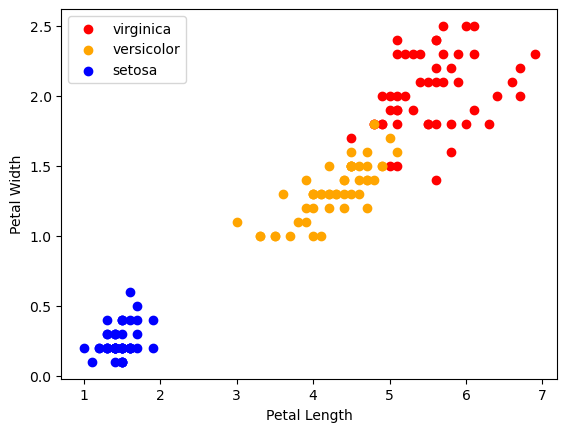

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal_length'], x['Petal_width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

# **Correlation Matrix**

In [19]:
df1 = df.drop(['Species'], axis=1)
df1.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

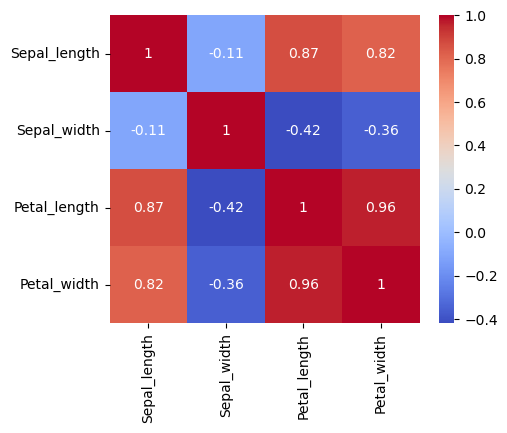

In [20]:
#plotting heatmap
corr = df1.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# **Model Testing and Training**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [22]:
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [23]:
#logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
print("Logistic Regression Accuracy:", model.score(x_test, y_test)*100)

Logistic Regression Accuracy: 95.55555555555556


In [25]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [26]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [27]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
print("K-Nearest Neighbor Accuracy:", model.score(x_test, y_test)*100)

K-Nearest Neighbor Accuracy: 95.55555555555556


In [29]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [30]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [31]:
#decision tree classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
print("Decision Tree Accuracy:", model.score(x_test, y_test)*100)

Decision Tree Accuracy: 93.33333333333333


In [33]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [34]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 93.33333333333333


In [35]:
#save the model
import pickle
filename = 'saved_model.sav'
pickle.dump(model, open(filename,'wb'))

In [36]:
#save the updated model
filename = 'saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [37]:
load_model = pickle.load(open(filename, 'rb'))

In [38]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)

In [39]:
load_model.predict([[4,3,1,5]])

array(['virginica'], dtype=object)